# Тема: Кластиризация

## Импорты



In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


!pip install plotly
import plotly.graph_objects as go

print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


# Загрузка датасета

## Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать. + чистка данных


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbSSDjy1OeajvbpdG-mWVUd-hU1_62k3zKsNAz1lCixOsv0KYUoYvBashA4QhGYOYlPc6d8Op6ipTr/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
print("Число столбцов до чистки = ", len(df.keys()))
df.keys()

Балакин Даниил ИНБО-02-21
Число столбцов до чистки =  31


Index(['NOMER', 'key', 'name', 'id', 'tags', 'image', 'splash', 'magic',
       'attack', 'defense', 'difficulty', 'attackDamagePerLevel',
       'healthRegen', 'manaRegen', 'manaPerLevel', 'magicResist',
       'criticalStrikeChance', 'movespeed', 'healthPerLevel', 'attackRange',
       'criticalStrikeChancePerLevel', 'armor', 'healthRegenPerLevel',
       'percentAttackSpeedPerLevel', 'attackSpeedOffset',
       'magicResistPerLevel', 'mana', 'health', 'armorPerLevel',
       'manaRegenPerLevel', 'attackDamage'],
      dtype='object')

In [ ]:
df = df.drop(columns=[])
df = df.drop(columns=["image"])
df = df.drop(columns=["splash"])
chek = df.columns
for i in chek:
  if type(df[i][1]) == np.int64 or type(df[i][1]) == np.float64:
    if sum(df[i]) == 0:
      df = df.drop(columns=[i])
print("Число столбцов после чистки = ", len(df.keys()))

Число столбцов после чистки =  27


In [ ]:
# Преоброзование данных столбца tags
for i in range(len(df.tags)):
   if isinstance(df.tags[i], str):
    df.tags[i] = df.tags[i].split(",")
    for j in range(len(df.tags[i])):
      df.tags[i][j] = df.tags[i][j].replace("'", "")
      df.tags[i][j] = df.tags[i][j].replace(" ", "")
      df.tags[i][j] = df.tags[i][j].replace("]", "")
      df.tags[i][j] = df.tags[i][j].replace("[", "")

<ipython-input-5-471deba84fa4>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.tags[i] = df.tags[i].split(",")
<ipython-input-5-471deba84fa4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [ ]:
df.tags[1][1]

'Assassin'

In [ ]:
for i in df.columns:
  print(f"Название столбца {i} занчение {df[i][3]}")

In [ ]:
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(df['tags'])
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)
df = pd.concat([df, tags_df], axis=1)
df = df.drop(columns=['tags'])
print(df.head())

Название столбца NOMER занчение 3
Название столбца key занчение Akshan
Название столбца name занчение Akshan
Название столбца id занчение 166
Название столбца tags занчение ['Marksman', 'Assassin']
Название столбца magic занчение 0
Название столбца attack занчение 0
Название столбца defense занчение 0
Название столбца difficulty занчение 0
Название столбца attackDamagePerLevel занчение 3.0
Название столбца healthRegen занчение 3.75
Название столбца manaRegen занчение 8.2
Название столбца manaPerLevel занчение 40.0
Название столбца magicResist занчение 30.0
Название столбца movespeed занчение 330.0
Название столбца healthPerLevel занчение 107.0
Название столбца attackRange занчение 500.0
Название столбца armor занчение 26.0
Название столбца healthRegenPerLevel занчение 0.65
Название столбца percentAttackSpeedPerLevel занчение 4.0
Название столбца attackSpeedOffset занчение 0.638
Название столбца magicResistPerLevel занчение 1.3
Название столбца mana занчение 350.0
Название столбца healt

In [ ]:
df = df.drop(columns=['key'])
df = df.drop(columns=['name'])


In [ ]:
df.head()

,NOMER,id,magic,attack,defense,difficulty,attackDamagePerLevel,healthRegen,manaRegen,manaPerLevel,...,health,armorPerLevel,manaRegenPerLevel,attackDamage,Assassin,Fighter,Mage,Marksman,Support,Tank
0,0,266,3,8,4,4,5.00,3.00,0.0,0.0,...,650.0,4.8,0.0,60.0,0,1,0,0,0,0
1,1,103,8,3,4,5,3.00,2.50,8.0,25.0,...,590.0,4.7,0.8,53.0,1,0,1,0,0,0
2,2,84,8,5,3,7,3.30,9.00,50.0,0.0,...,600.0,4.7,0.0,62.0,1,0,0,0,0,0
3,3,166,0,0,0,0,3.00,3.75,8.2,40.0,...,630.0,4.7,0.7,52.0,1,0,0,1,0,0
4,4,12,5,6,9,7,3.75,8.50,8.5,40.0,...,685.0,4.7,0.8,62.0,0,0,0,0,1,1


Провести кластеризацию данных с помощью алгоритма k-means.
Использовать «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров.

In [ ]:
models = []
score1 = []
score2 = []
for i in range(2,10):
  model = KMeans(n_clusters=i, random_state = 123, init = 'k-means++').fit(df)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(df, model.labels_))

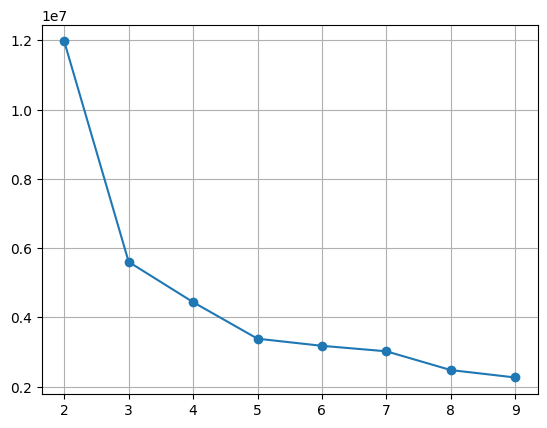

In [ ]:
plt.grid()
plt.plot(np.arange(2,10), score1, marker = 'o')
plt.show()

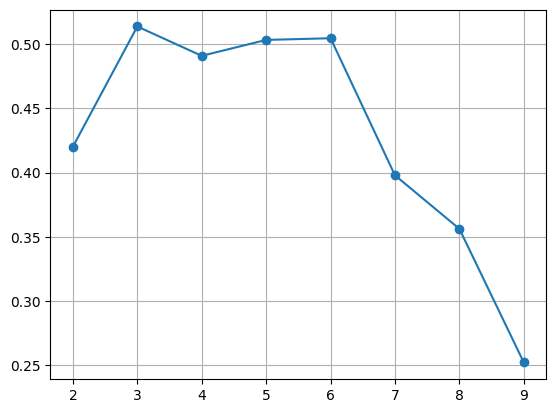

In [ ]:
plt.grid()
plt.plot(np.arange(2,10), score2, marker = 'o')
plt.show()

In [ ]:
model1 = KMeans(n_clusters=3, random_state = 123, init = 'k-means++').fit(df)
model1.cluster_centers_
df['cluster'] = model1.labels_
df['cluster'].value_counts()

,count
cluster,
0,77
1,70
2,20


In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['NOMER'],
    y=df['attack'],
    z=df['manaPerLevel'],
    mode='markers',
    marker_color=df['cluster'],
    marker_size=4
)])
fig.show()

Провести кластеризацию данных с помощью алгоритма иерархической
кластеризации

In [ ]:
model2 = AgglomerativeClustering(n_clusters=3, compute_distances=True)
clastering = model2.fit_predict(df)
df["cluster"] = model2.labels_

fig = go.Figure(data=[go.Scatter3d(
    x=df['NOMER'],
    y=df['attack'],
    z=df['manaPerLevel'],
    mode='markers',
    marker_color=df['cluster'],
    marker_size=4
)])
fig.show()

Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [ ]:

model3 = DBSCAN(eps=0.01, min_samples=3, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=3, p=None, n_jobs=None)
df['cluster'] = model3.fit_predict(df)
fig = go.Figure(data=[go.Scatter3d(
    x=df['NOMER'],
    y=df['attack'],
    z=df['manaPerLevel'],
    mode='markers',
    marker_color=df['cluster'],
    marker_size=4
)])
fig.show()